In [1]:
import pandas as pd
import math, os, sys, glob
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 500
pd.set_option('display.max_columns', 1000)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append(os.path.abspath(os.path.join('../src/')))

In [3]:
from preprocess import Preprocess
from user import User
from action_logging import Logger

In [4]:
logger = Logger(log_flag = True, log_file = "run", log_path = "../logs/")

### Load and Clean data

In [5]:
preprocess = Preprocess(input_file = '../data/input.txt', logger = logger)

preprocess.read_file()
preprocess.print_sample(10)

>> In preprocess.py (read_file): Reading of input file: ../data/input.txt starts <<
>> In preprocess.py (read_file): Reading of input file: ../data/input.txt ends <<
>> In preprocess.py (print_sample): Printing of data (first 10 lines) starts <<
['24/01/16, 12:25 pm - Kartheek Palepu: ,🐶', '25/01/16, 9:39 am - Kartheek Palepu: Na kodaka tega tirgtnavga 😝', 'Basket ball a? Emana ardam aindq😂', '25/01/16, 9:59 am - Kinetic USA: Hehe ardamavdanki emundi ra', '25/01/16, 9:59 am - Kinetic USA: I know kada', '25/01/16, 9:59 am - Kinetic USA: 😝😝', '25/01/16, 10:00 am - Kartheek Palepu: Hehehe ne bonda ra ne bonda', '25/01/16, 10:00 am - Kartheek Palepu: Sunil anattu antav..okkodiki okko ball ivvachga ani', '25/01/16, 10:01 am - Kinetic USA: Ssshhhuuu', '25/01/16, 10:01 am - Kinetic USA: Naa talent gurinchi ardam kaatle niku']
>> In preprocess.py (print_sample): Printing of data (first 10 lines) ends <<


In [6]:
preprocess.clean_data()

>> In preprocess.py (clean_data): Cleaning of data starts <<
>> In preprocess.py (clean_data): Cleaning of data ends <<


In [7]:
preprocess.drop_message()

>> In preprocess.py (drop_message): Dropping message containing: Messages to this chat and calls are now secured with end-to-end encryption starts <<
>> In preprocess.py (drop_message): Dropping message containing: Messages to this chat and calls are now secured with end-to-end encryption ends <<


In [8]:
preprocess.prepare_df()

>> In preprocess.py (prepare_df): Preparation of data frame starts <<
>> In preprocess.py (prepare_df): Preparation of data frame ends <<


In [9]:
preprocess.check_n_users()

>> In preprocess.py (check_n_users): You Chat data have 2 users. <<


In [10]:
preprocess.pd_data

,Timestamp,User,Message,Date,Weekday
0,2016-01-24 12:25:00,Kartheek Palepu,",🐶",24-Jan-2016,Sun
1,2016-01-25 09:39:00,Kartheek Palepu,Na kodaka tega tirgtnavga 😝,25-Jan-2016,Mon
2,2016-01-25 09:39:00,Kartheek Palepu,Basket ball a? Emana ardam aindq😂,25-Jan-2016,Mon
3,2016-01-25 09:59:00,Kinetic USA,Hehe ardamavdanki emundi ra,25-Jan-2016,Mon
4,2016-01-25 09:59:00,Kinetic USA,I know kada,25-Jan-2016,Mon
...,...,...,...,...,...
10635,2019-01-24 09:32:00,Kartheek Palepu,Text parsing,24-Jan-2019,Thu
10636,2019-01-24 09:32:00,Kinetic USA,Hey bokka ra. Nuvvh chey cheptha muzzef gadi c...,24-Jan-2019,Thu
10637,2019-01-24 09:33:00,Kartheek Palepu,Andhuloo vaadi kaaama Daridrame untadi😂,24-Jan-2019,Thu
10638,2019-01-24 09:33:00,Kartheek Palepu,Endku cheppu choosi baadhapadatam tappa,24-Jan-2019,Thu


### Analysis
#### User based analysis

In [11]:
from user import User

In [12]:
print(f"Starting for User: {preprocess.users[0]}")
user_subset_data = preprocess.pd_data[preprocess.pd_data['User'] ==
                                      preprocess.users[0]]
user_data = User(
    user_name=preprocess.users[0],
    messages=user_subset_data['Message'],
    timestamp=user_subset_data['Timestamp'],
    logger=logger)
user_data.get_clean_messages().get_link_count().get_emoji_count(
).get_emoji_count()

Starting for User: Kartheek Palepu
>> In user.py (__init__): Initializing members for user: Kartheek Palepu starts <<
>> In user.py (__init__): Initializing members for user: Kartheek Palepu ends <<
>> In user.py (get_clean_messages): Cleaning of messages starts <<
>> In user.py (remove_emoticons): Removing punctuation starts <<
>> In user.py (remove_emoticons): Removing punctuation ends <<
>> In user.py (remove_emoticons): Removing emoticons starts <<
>> In user.py (remove_emoticons): Removing emoticons ends <<
>> In user.py (remove_links): Removing links starts <<
>> In user.py (remove_links): Removing links ends <<
>> In user.py (get_clean_messages): Cleaning of messages ends <<
>> In user.py (get_link_count): Counting of links starts <<
>> In user.py (get_link_count): Counting of links ends <<
>> In user.py (get_emoji_count): Counting of emoji starts <<
>> In user.py (get_emoji_count): Counting of emoji ends <<
>> In user.py (get_emoji_count): Counting of emoji starts <<
>> In user

#### Total statistics

In [13]:
user_data.get_total_stats()

>> In user.py (get_total_stats): Formulating Totals Statistics starts <<
>> In user.py (get_word_statistics): Formulating Word Statistics starts <<
>> In user.py (get_word_statistics): Tokenization starts <<
>> 	Found 14532 words, 13568 bigram words, 9580 trigram words <<
>> In user.py (get_word_statistics): Tokenization ends <<
>> In user.py (get_word_statistics): Stop word removal starts <<
>> In user.py (get_word_statistics): Stop word removal ends <<
>> In user.py (get_word_statistics): Stemming and Lemmatization starts <<
>> In user.py (get_word_statistics): Stemming and Lemmatization ends <<
>> In user.py (get_word_statistics): Formulating Word Statistics ends <<
>> In user.py (get_total_stats): Formulating Totals Statistics ends <<


In [14]:
user_data.n_messages, user_data.n_words, user_data.n_unique_words, user_data.n_links, user_data.n_emoji, user_data.n_screen_touches

(6077, 14532, 6301, 44, 2207, 104308)

In [15]:
user_data.first_msg_date, user_data.recent_msg_date, user_data.most_active_date, user_data.least_active_date

({'Date': '24-Jan-2016', 'N_Messages': 1},
 {'Date': '24-Jan-2019', 'N_Messages': 33},
 {'Date': '24-Sep-2017', 'N_Messages': 154},
 {'Date': '31-May-2017', 'N_Messages': 1})

In [16]:
user_data.n_days, user_data.n_days_chatted

(1095, 350)

In [17]:
user_data.most_used_double_word, user_data.most_used_word, user_data.most_used_triple_word

({'Word': 'group lo', 'Count': 28},
 {'Word': 'hahaha', 'Count': 311},
 {'Word': 'all the best', 'Count': 12})

In [18]:
user_data.get_emoji_statistics()

>> In user.py (get_emoji_statistics): Formulating Emoji Statistics starts <<
>> In user.py (get_emoji_statistics): Formulating Emoji Statistics ends <<


In [19]:
user_data.most_used_emoji

{'Emoji': '😛', 'Count': 537}

#### Average stats

In [20]:
user_data.get_avg_stats()

>> In user.py (get_avg_stats): Formulating Average Statistics starts <<
>> In user.py (get_avg_stats): Formulating Average Statistics ends <<


In [21]:
user_data.avg_messages_per_day, user_data.avg_emojis_per_day, user_data.avg_links_per_day, user_data.avg_letters_per_message, user_data.avg_words_per_message

(17.0, 6.0, 1.0, 19.0, 3.0)

#### Top stats

In [22]:
user_data.get_top_stats(data = preprocess.pd_data)

>> In user.py (get_top_stats): Formulating Top Statistics starts <<
>> 	In user.py (get_top_stats): Formulating Active Day Statistics starts <<
>> 	In user.py (get_top_stats): Formulating Active Day Statistics ends <<
>> 	In user.py (get_top_stats): Formulating Longest Conversation Day Statistics starts <<
>> In response.py (get_the_longest_conversation_date): Getting the longest conversation date starts <<
>> In response.py (group_the_data): Grouping the data starts <<
>> In response.py (group_the_data): Grouping the data ends <<
>> In response.py (create_response_time): Creating Response time starts <<
>> In response.py (create_response_time): Creating Response time ends <<
>> In response.py (date_wise_response): Creating Date wise Response starts <<
>> In response.py (date_wise_response): Creating Date wise Response ends <<
>> In response.py (score_sort_responses): Score and Sort the response starts <<
>> In response.py (score_sort_responses): Score and Sort the response ends <<
>> 

In [23]:
user_data.top_active_day, user_data.longest_conversation_day

({'Date': '24-Sep-2017',
  'N_Messages': 154,
  'Duration (Min)': 23,
  'N Words': 512,
  'N Emojis': 52},
 {'Date': '12-Nov-2016',
  'N_Messages': 114,
  'Duration (Min)': 36,
  'N Words': 456,
  'N Emojis': 50})

#### Response time stats

In [24]:
user_data.get_response_time(data = preprocess.pd_data)
user_data.avg_response_time

>> In response.py (group_the_data): Grouping the data starts <<
>> In response.py (group_the_data): Grouping the data ends <<
>> In response.py (create_response_time): Creating Response time starts <<
>> In response.py (create_response_time): Creating Response time ends <<


1.702

### Plots
#### Top K Single words

In [25]:
from plot import Plot

>> In user.py (get_word_statistics): Fetching top 20 Words starts <<
>> In user.py (get_word_statistics): Fetching top 20 Words ends <<


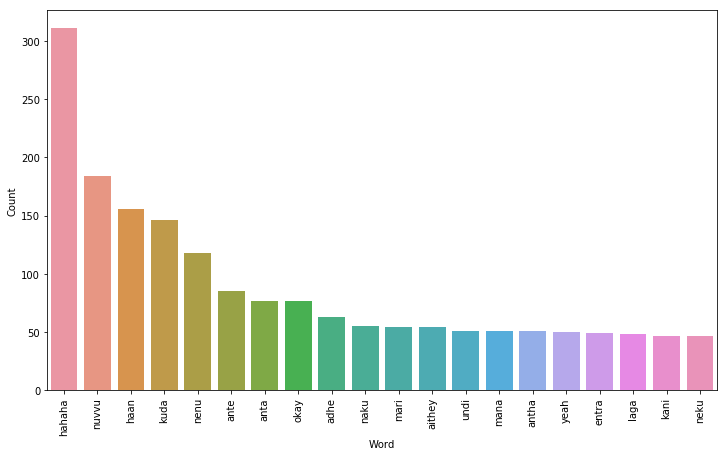

In [26]:
Plot(user_object = user_data).plot_top_k_ngrams(n_grams=1, k = 20)

>> In user.py (get_word_statistics): Fetching top 20 Words starts <<
>> In user.py (get_word_statistics): Fetching top 20 Words ends <<


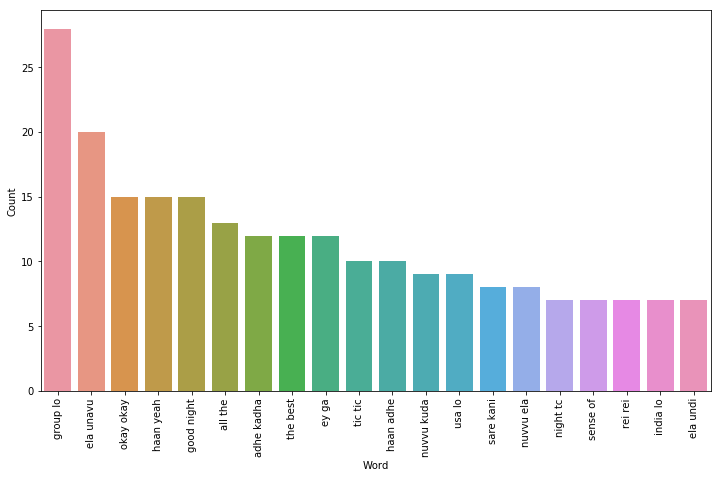

In [27]:
Plot(user_object = user_data).plot_top_k_ngrams(n_grams = 2, k = 20)

>> In user.py (get_word_statistics): Fetching top 20 Words starts <<
>> In user.py (get_word_statistics): Fetching top 20 Words ends <<


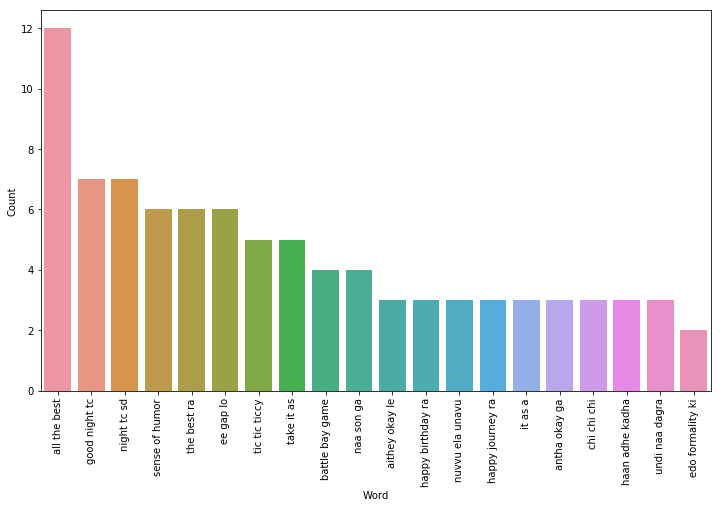

In [28]:
Plot(user_object = user_data).plot_top_k_ngrams(n_grams = 3, k = 20)

In [37]:
Plot(user_object = user_data).plot_top_k_emojis(k = 5, normalize=True)

,Emoji,Count,Count %
0,😛,0.243317,24.0
1,😂,0.151790,15.0
2,😝,0.148618,15.0
3,😋,0.134119,13.0
4,🏻,0.067059,7.0


>> In user.py (get_words_for_wordcloud): Fetching Words for WordCloud starts <<
>> In user.py (get_top_k_emojis): Fetching  Words for WordCloud ends <<


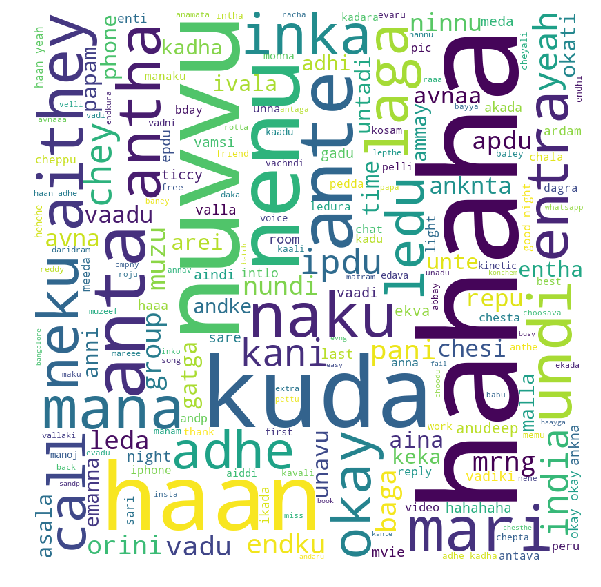

In [41]:
Plot(user_object = user_data).plot_word_cloud()

>> In user.py (get_words_for_wordcloud): Fetching Words for WordCloud starts <<
>> In user.py (get_top_k_emojis): Fetching  Words for WordCloud ends <<


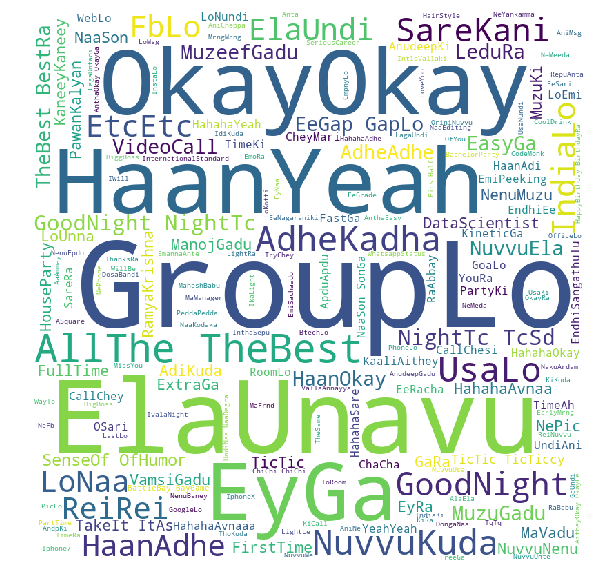

In [44]:
Plot(user_object = user_data).plot_word_cloud(n_grams=2)

In [ ]:
Plot(user_object = user_data).plot_word_cloud(n_grams=3)